In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [17]:
print(df.shape)

(104272, 33)


In [18]:
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

   YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0       2011     2011           AK       Alaska      BRFSS   
1       2011     2011           AK       Alaska      BRFSS   
2       2011     2011           AK       Alaska      BRFSS   
3       2011     2011           AK       Alaska      BRFSS   
4       2011     2011           AK       Alaska      BRFSS   

                     Class                         Topic  \
0  Obesity / Weight Status       Obesity / Weight Status   
1  Obesity / Weight Status       Obesity / Weight Status   
2        Physical Activity  Physical Activity - Behavior   
3  Obesity / Weight Status       Obesity / Weight Status   
4  Obesity / Weight Status       Obesity / Weight Status   

                                            Question  Data_Value_Unit  \
0  Percent of adults aged 18 years and older who ...           2011.0   
1  Percent of adults aged 18 years and older who ...           2011.0   
2  Percent of adults who achieve at least 150 m

In [19]:
df['Data_Value'] = df['Data_Value'].fillna(df['Data_Value'].median())
df['Age(years)'] = df['Age(years)'].fillna(df['Age(years)'].mode()[0])
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip() #Removes spaces in column name

In [20]:

print(df['Gender'].value_counts())

Gender
Female    3724
Male      3724
Name: count, dtype: int64


In [21]:
df['Data_Value_Unit'] = df['Data_Value_Unit'].fillna(df['Data_Value_Unit'].mode()[0])

In [22]:
df_pa = df[df['Topic'].str.contains('Physical Activity', case=False, na=False)]
df_pa = df_pa[df_pa['Data_Value'] > 40]
df_obesity = df[df['Topic'].str.contains('Obesity', case=False, na=False)]
df_combined = pd.merge(df_pa[['LocationAbbr', 'YearStart', 'Data_Value']], 
                       df_obesity[['LocationAbbr', 'YearStart', 'Data_Value']], 
                       on=['LocationAbbr', 'YearStart'], suffixes=('_PA', '_Obesity'))
corr_pa_obesity = df_combined[['Data_Value_PA', 'Data_Value_Obesity']].corr()
print("Correlation between Physical Activity and Obesity Rates: ", corr_pa_obesity)

Correlation between Physical Activity and Obesity Rates:                      Data_Value_PA  Data_Value_Obesity
Data_Value_PA            1.000000           -0.045043
Data_Value_Obesity      -0.045043            1.000000


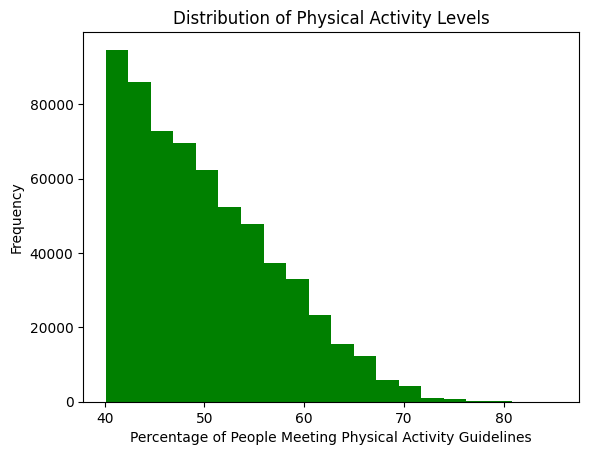

In [23]:
plt.hist(df_combined['Data_Value_PA'], bins=20, color='green')
plt.title('Distribution of Physical Activity Levels')
plt.xlabel('Percentage of People Meeting Physical Activity Guidelines')
plt.ylabel('Frequency')
plt.show()

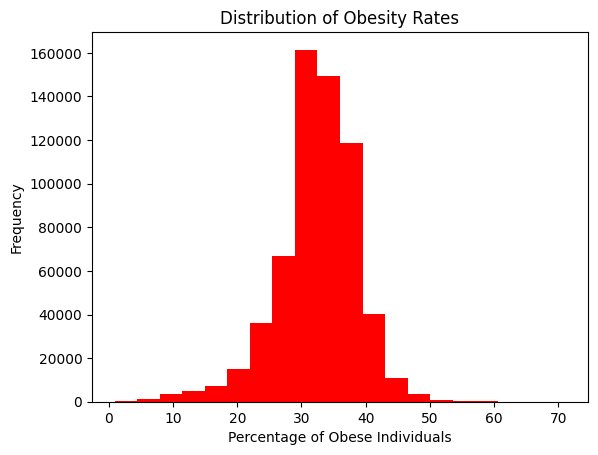

In [24]:
plt.hist(df_combined['Data_Value_Obesity'], bins=20, color='red')
plt.title('Distribution of Obesity Rates')
plt.xlabel('Percentage of Obese Individuals')
plt.ylabel('Frequency')
plt.show()

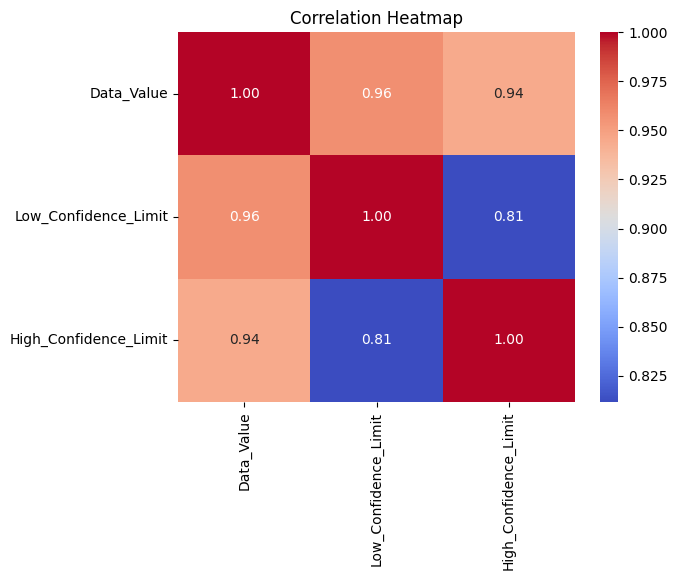

In [25]:
corr = df[['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show() #Show correlations between numerical columns through heatmap

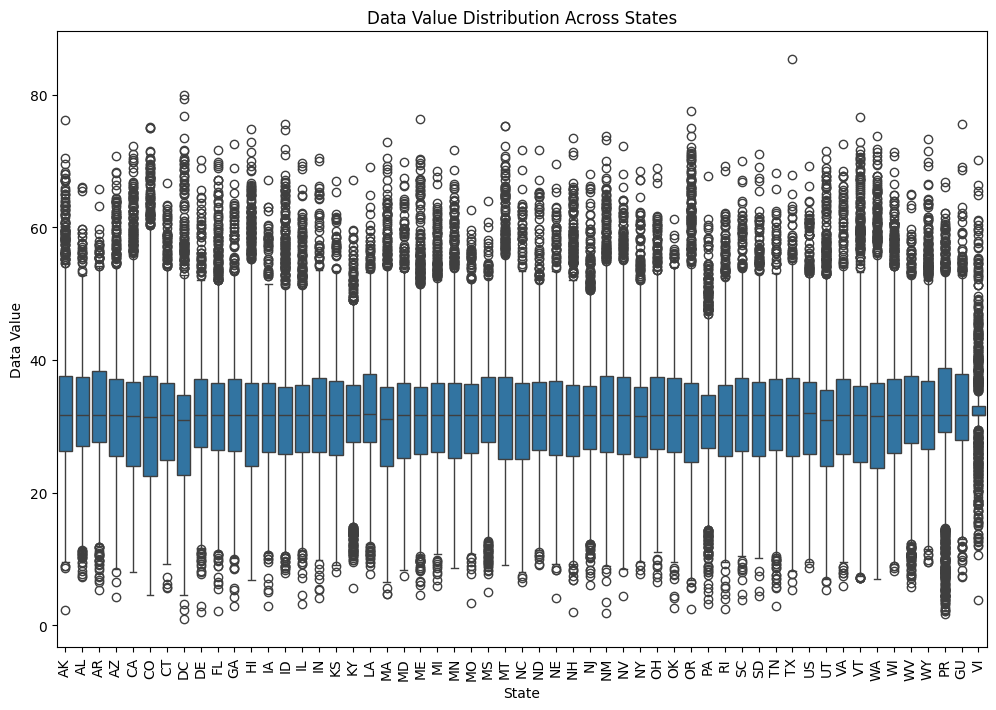

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='LocationAbbr', y='Data_Value', data=df)
plt.title('Data Value Distribution Across States')
plt.xlabel('State')
plt.ylabel('Data Value')
plt.xticks(rotation=90)
plt.show()

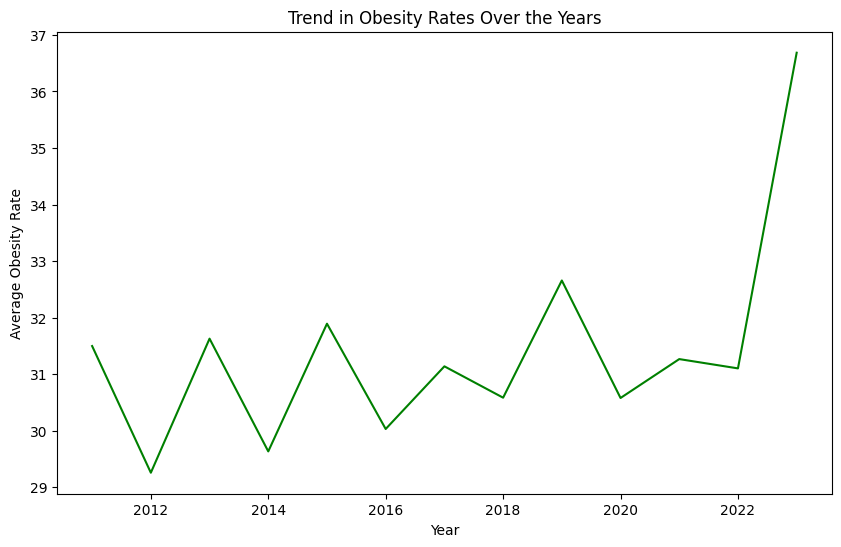

In [27]:
yearly_avg = df.groupby('YearStart')['Data_Value'].mean()

plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='line', color='green')
plt.title('Trend in Obesity Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Obesity Rate')
plt.show()